# ✈️ Airline Passenger Satisfaction Prediction

In this project, we aim to build a machine learning model to predict passenger satisfaction based on various features related to airline services and flight experience. The dataset contains information such as customer type, travel class, service ratings (like inflight wifi, seat comfort, cleanliness), and delay times.

We will use a **Decision Tree Classifier** to analyze the data and identify the key factors that contribute to a passenger being *satisfied* or *dissatisfied* with their flight.

The overall process includes:
- Exploratory data analysis
- Data cleaning and preprocessing
- Model training and evaluation
- Visualizing the decision tree and interpreting the results

Let’s begin by loading and exploring the dataset.


In [49]:
import pandas as pd

full_data = pd.read_csv('Airplane.csv')

full_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 📊 Dataset Dimensions

Let's check the overall size of the dataset — the number of rows (samples) and columns (features).


In [50]:
full_data.shape

(103904, 25)

## 🧾 Dataset Overview and Feature Description

In this step, we will inspect the overall structure of the dataset using `.info()` to understand the types of features, their data types, and the presence of any missing values.

The dataset includes the following variables:

- **id**: Unique identifier for each passenger.
- **Gender**: Gender of the passenger (*Male* or *Female*).
- **Customer Type**: Indicates whether the passenger is a *Loyal* or *Disloyal* customer.
- **Age**: Age of the passenger.
- **Type of Travel**: Purpose of the trip — either *Business Travel* or *Personal Travel*.
- **Class**: Travel class — *Business*, *Eco*, or *Eco Plus*.
- **Flight Distance**: Distance (in miles) of the flight.
- **Inflight wifi service**: Rating for in-flight Wi-Fi service (0 = Not Applicable, 1–5).
- **Departure/Arrival time convenient**: Rating of time convenience.
- **Ease of Online booking**: Satisfaction with the online booking process.
- **Gate location**: Satisfaction with the gate location at the airport.
- **Food and drink**: Satisfaction with food and beverages offered.
- **Online boarding**: Satisfaction with the online boarding process.
- **Seat comfort**: Satisfaction with seat comfort.
- **Inflight entertainment**: Satisfaction with in-flight entertainment.
- **On-board service**: Overall rating of in-flight service.
- **Leg room service**: Satisfaction with the amount of leg room.
- **Baggage handling**: Satisfaction with baggage handling services.
- **Check-in service**: Satisfaction with the check-in process.
- **Inflight service**: General rating of in-flight service.
- **Cleanliness**: Rating of aircraft cleanliness.
- **Departure Delay in Minutes**: Delay at departure (in minutes).
- **Arrival Delay in Minutes**: Delay upon arrival (in minutes).
- **Satisfaction**: Target variable — either *Satisfied* or *Neutral or Dissatisfied*.



In [51]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## 📊 Distribution of Service Ratings

We will visualize the score distribution for several service-related features (0 = Not Applicable, 1–5 = Satisfaction level).  
These include: inflight Wi-Fi, time convenience, online booking, gate location, food & drink, seat comfort, entertainment, on-board service, leg room, baggage handling, check-in, inflight service, and cleanliness.


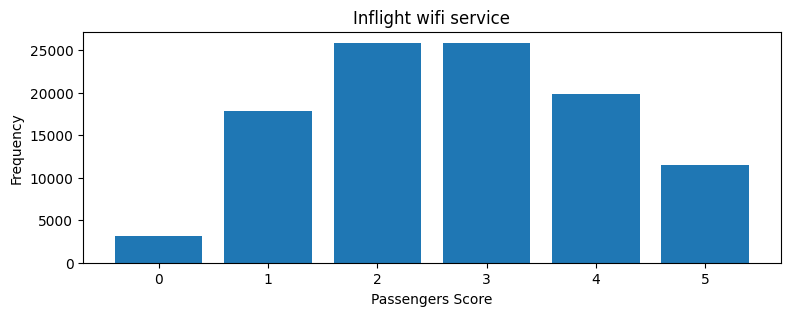

Inflight wifi service: 
 Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: count, dtype: int64


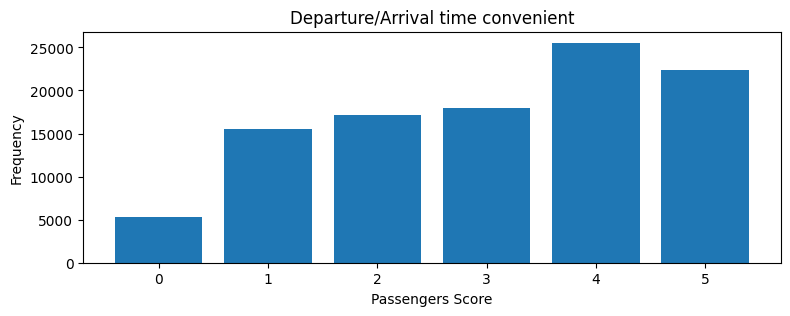

Departure/Arrival time convenient: 
 Departure/Arrival time convenient
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: count, dtype: int64


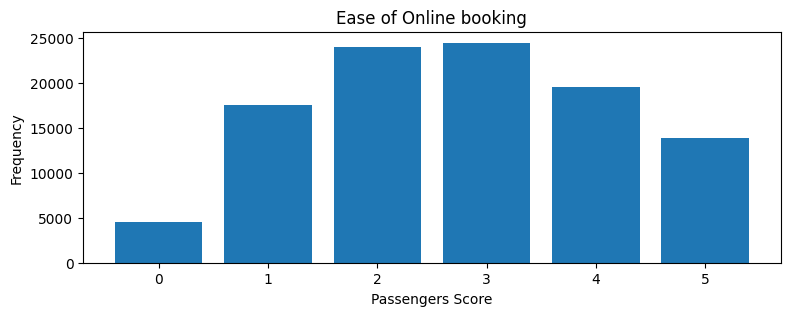

Ease of Online booking: 
 Ease of Online booking
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: count, dtype: int64


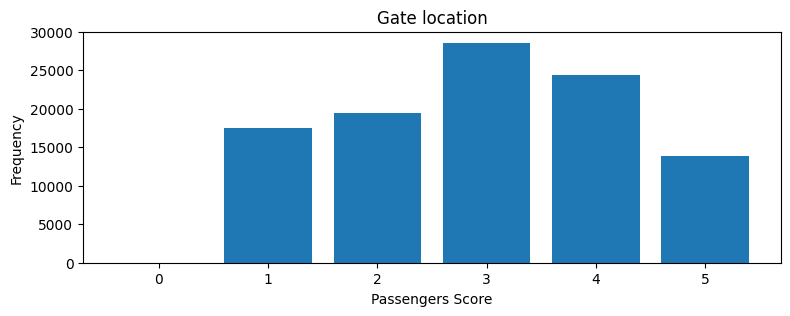

Gate location: 
 Gate location
3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: count, dtype: int64


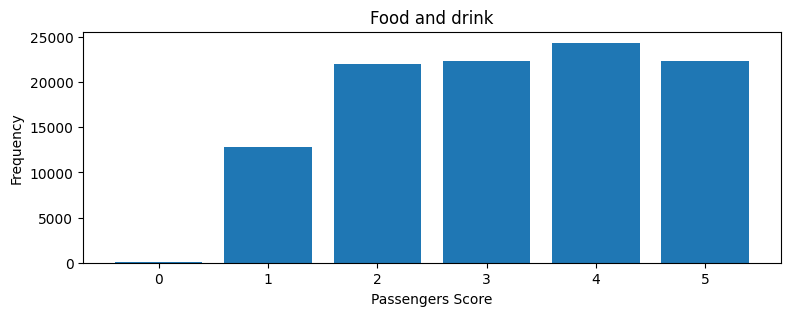

Food and drink: 
 Food and drink
4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: count, dtype: int64


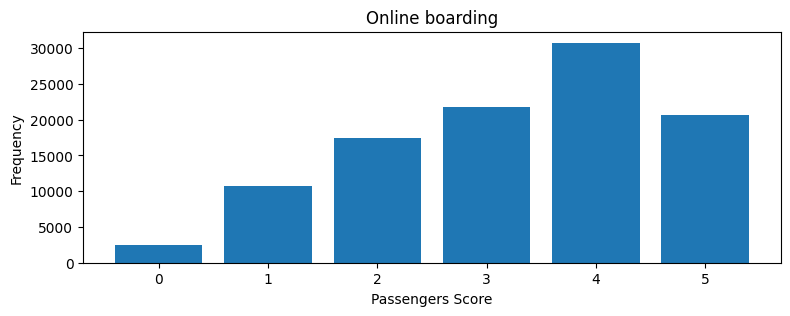

Online boarding: 
 Online boarding
4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: count, dtype: int64


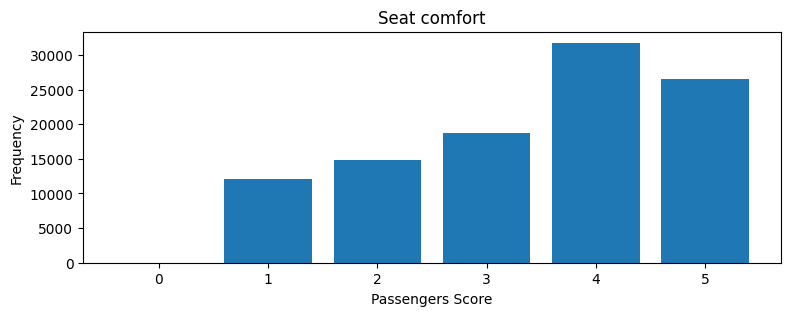

Seat comfort: 
 Seat comfort
4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: count, dtype: int64


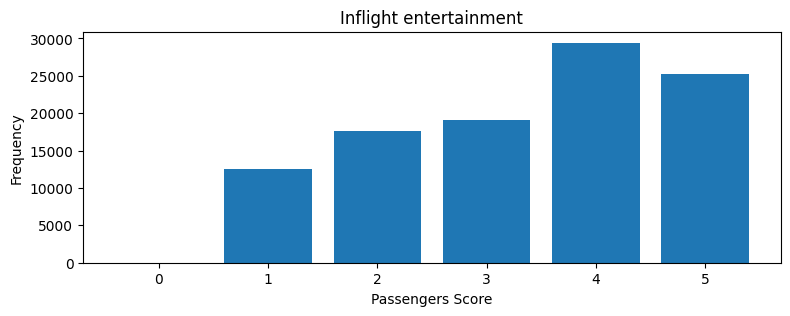

Inflight entertainment: 
 Inflight entertainment
4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: count, dtype: int64


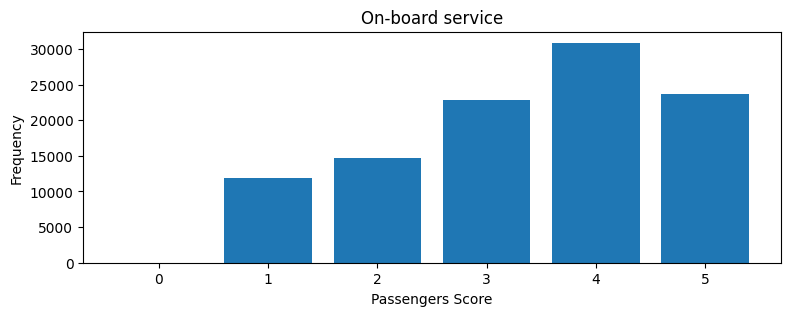

On-board service: 
 On-board service
4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: count, dtype: int64


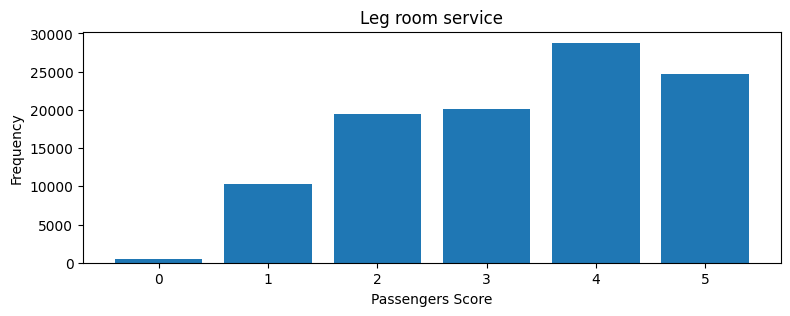

Leg room service: 
 Leg room service
4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: count, dtype: int64


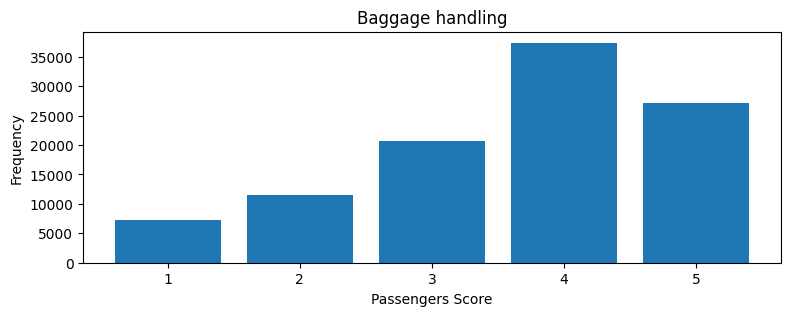

Baggage handling: 
 Baggage handling
4    37383
5    27131
3    20632
2    11521
1     7237
Name: count, dtype: int64


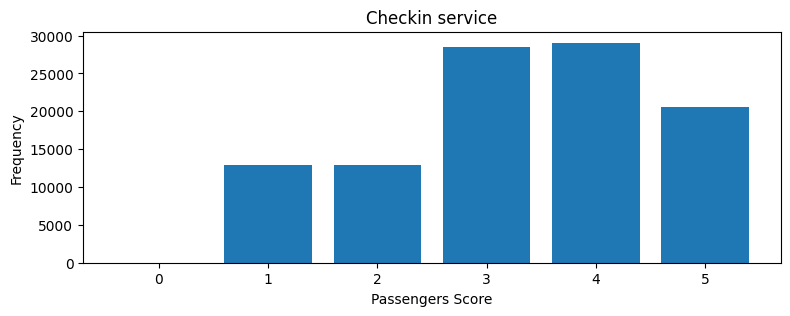

Checkin service: 
 Checkin service
4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: count, dtype: int64


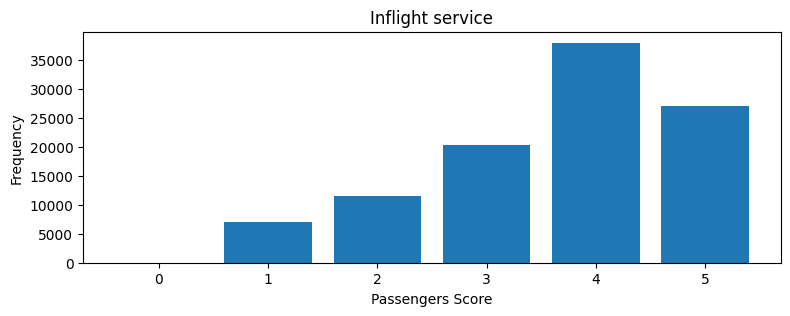

Inflight service: 
 Inflight service
4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: count, dtype: int64


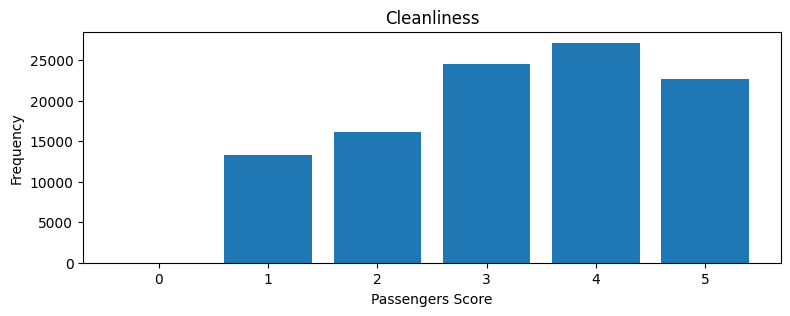

Cleanliness: 
 Cleanliness
4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: count, dtype: int64


In [52]:
import matplotlib.pyplot as plt

def bar_plot(variable):
    
    var=full_data[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

categorical_features_1=["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",]
for c in categorical_features_1:
    bar_plot(c)

## 📋 Frequency of Key Categorical Features

We will display the frequency counts for key categorical variables such as gender, customer type, type of travel, travel class, and overall satisfaction level.  
This helps us understand the distribution of passengers across these categories before modeling.


In [53]:
categorical_features_2=["Gender", "Customer Type", "Type of Travel", "Class","satisfaction"]
for c in categorical_features_2:
    print("{} \n".format(full_data[c].value_counts()))

Gender
Female    52727
Male      51177
Name: count, dtype: int64 

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64 

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64 

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64 

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64 



## 📈 Distribution of Numerical Features

We will plot histograms for numerical variables such as passenger ID, age, flight distance, and departure/arrival delays.  
These plots help visualize the spread and detect any skewness or outliers in the data.


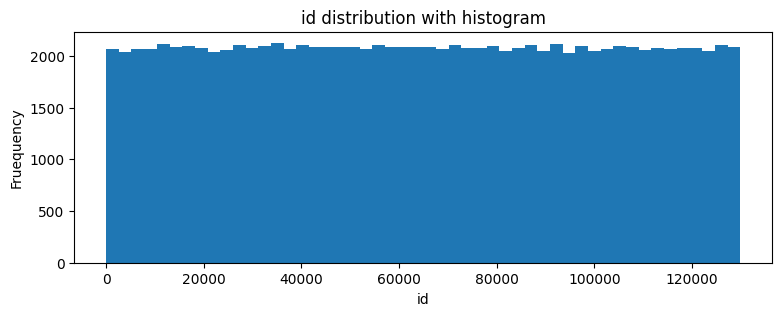

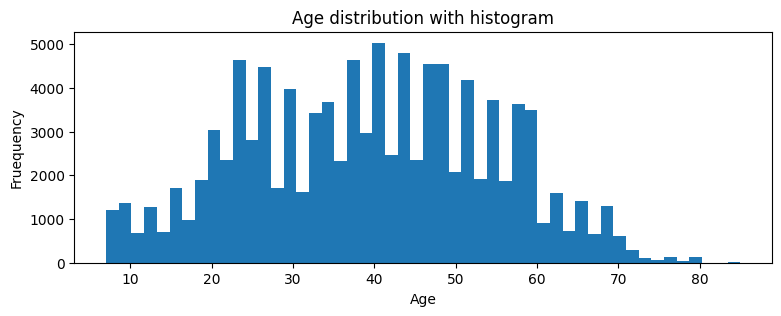

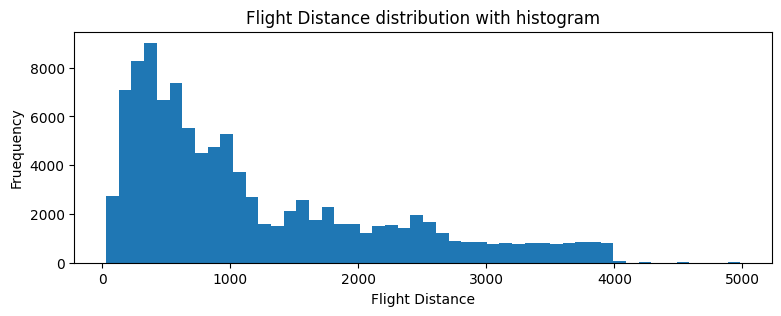

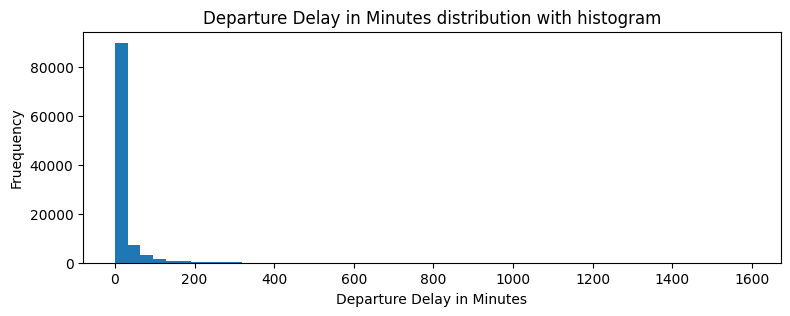

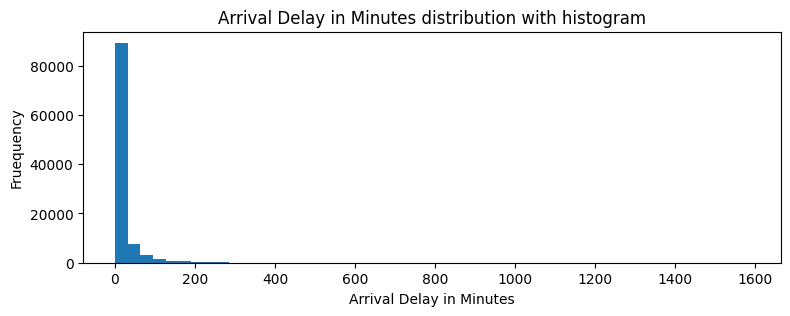

In [54]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(full_data[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Fruequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

numerical_features=["id","Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
for n in numerical_features:
    plot_hist(n)

## 📊 Satisfaction Analysis by Features

We will explore how the average passenger satisfaction score varies across different demographic and service-related features.  
By grouping each feature and calculating the mean satisfaction value, we can identify which factors are most strongly associated with higher satisfaction.  
The features analyzed include:

- Gender  
- Age  
- Type of Travel  
- Class  
- Customer Type  
- Cleanliness  
- Inflight Wi-Fi service  
- Inflight entertainment  
- Food and drink  
- Seat comfort


In [55]:
# satisfaction = target
full_data['satisfaction'] = full_data['satisfaction'].map({"neutral or dissatisfied": 0, "satisfied": 1}).astype(float)

# Gender vs satisfaction
full_data[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Gender,satisfaction
1,Male,0.439475
0,Female,0.427371


In [56]:
# Age vs satisfaction
full_data[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
34,41,0.607899
39,46,0.599819
44,51,0.597249
50,57,0.590102
45,52,0.586207
...,...,...
2,9,0.137283
63,70,0.136143
3,10,0.131772
1,8,0.107813


In [57]:
# Type_of_Travel vs satisfaction
full_data[["Type of Travel","satisfaction"]].groupby(["Type of Travel"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Type of Travel,satisfaction
0,Business travel,0.582597
1,Personal Travel,0.101678


In [58]:
# Class vs satisfaction
full_data[["Class","satisfaction"]].groupby(["Class"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Class,satisfaction
0,Business,0.694251
2,Eco Plus,0.246064
1,Eco,0.186138


In [59]:
# Customer_Type vs satisfaction
full_data[["Customer Type","satisfaction"]].groupby(["Customer Type"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Customer Type,satisfaction
0,Loyal Customer,0.477291
1,disloyal Customer,0.236658


In [60]:
# Cleanliness vs satisfaction
full_data[["Cleanliness","satisfaction"]].groupby(["Cleanliness"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Cleanliness,satisfaction
5,5,0.608797
4,4,0.535340
3,3,0.431879
2,2,0.212993
1,1,0.196201
0,0,0.000000


In [61]:
# Inflight_wifi_service vs satisfaction
full_data[["Inflight wifi service","satisfaction"]].groupby(["Inflight wifi service"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Inflight wifi service,satisfaction
0,0,0.997422
5,5,0.990758
4,4,0.598969
1,1,0.325448
3,3,0.250580
2,2,0.248664


In [62]:
# Inflight_entertainment vs satisfaction
full_data[["Inflight entertainment","satisfaction"]].groupby(["Inflight entertainment"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Inflight entertainment,satisfaction
5,5,0.648435
4,4,0.611766
3,3,0.270077
2,2,0.213302
1,1,0.139846
0,0,0.000000


In [63]:
# Food_and_drink vs satisfaction
full_data[["Food and drink","satisfaction"]].groupby(["Food and drink"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Food and drink,satisfaction
5,5,0.549007
4,4,0.524981
0,0,0.467290
3,3,0.396368
2,2,0.387939
1,1,0.200047


In [64]:
# Seat_comfort vs satisfaction
full_data[["Seat comfort","satisfaction"]].groupby(["Seat comfort"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Seat comfort,satisfaction
5,5,0.650208
4,4,0.561152
2,2,0.224139
1,1,0.223188
3,3,0.211543
0,0,0.000000


### Detecting Multiple Outliers Using the IQR Method  

In this step, we define a custom `counter` function to count occurrences of indices, and use it in the `detect_outliers` function to identify passengers who are outliers in more than two numerical features.  

The process works as follows:  
1. For each numerical feature in the dataset, calculate the **first quartile (Q1)** and **third quartile (Q3)**.  
2. Compute the **interquartile range (IQR = Q3 - Q1)**.  
3. Define the outlier boundaries using **1.5 × IQR** as the threshold.  
4. Store the indices of all rows that fall outside these boundaries.  
5. Count how many times each index appears (using the custom `counter` function).  
6. Return only those indices that are outliers in more than two features.  

Finally, we display the subset of the dataset corresponding to these multiple outliers.


In [65]:
import numpy as np

def counter(lst):
    counts = {}
    for item in lst:
        counts[item] = counts.get(item, 0) + 1
    return counts

def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        # 1st quartile
        Q1=np.percentile(df[c],25)
        
        # 3rd quartile
        Q3=np.percentile(df[c],75)
        
        # IQR
        IQR= Q3-Q1
        
        # Outlier Step
        outlier_step= IQR * 1.5
        
        # Detect outlier and their indeces 
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        
        # Store indices 
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

full_data.loc[detect_outliers(full_data,[ 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'])]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1876,1876,66058,Male,Loyal Customer,66,Business travel,Business,3829,3,5,...,3,3,3,3,1,3,3,42,41.0,0.0
2363,2363,14315,Female,Loyal Customer,55,Business travel,Business,3861,2,1,...,2,2,3,2,1,2,1,42,39.0,0.0
2970,2970,120215,Female,Loyal Customer,13,Business travel,Business,3990,3,5,...,3,4,1,3,1,3,3,36,19.0,0.0
5639,5639,106154,Male,Loyal Customer,37,Business travel,Business,3990,3,5,...,3,3,2,3,1,3,2,44,40.0,0.0
5732,5732,70437,Female,Loyal Customer,54,Business travel,Business,3801,1,5,...,4,4,3,1,1,4,4,38,28.0,0.0
14195,14195,14938,Male,Loyal Customer,33,Business travel,Business,3891,3,3,...,5,4,4,1,1,4,5,84,79.0,1.0
14306,14306,73409,Female,Loyal Customer,61,Business travel,Business,3861,3,3,...,5,5,5,5,1,5,4,42,45.0,1.0
18509,18509,110386,Female,Loyal Customer,9,Business travel,Business,3814,2,3,...,2,3,1,4,1,3,2,83,83.0,0.0
20311,20311,45906,Male,Loyal Customer,36,Business travel,Business,3901,3,1,...,3,3,3,3,1,3,2,75,71.0,0.0
21191,21191,74135,Female,Loyal Customer,45,Business travel,Business,3897,1,5,...,4,2,4,3,1,1,1,123,134.0,0.0


In [66]:
# drop outliers
full_data = full_data.drop(detect_outliers(full_data,[ 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']),axis = 0).reset_index(drop = True)

### Handling Missing Values  

We first check for missing values in the dataset using `isnull().sum()`.   
We replace the missing values with the **mean** of the column.  
This approach helps retain all records while minimizing bias compared to simply removing rows.


In [67]:
full_data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             309
satisfaction    

In [68]:
full_data["Arrival Delay in Minutes"]=full_data["Arrival Delay in Minutes"].fillna(np.mean(full_data["Arrival Delay in Minutes"]))

full_data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Encoding & Binning Features  

Categorical variables are converted to numeric codes, and continuous variables are grouped into ranges (binning).  
This includes encoding `Gender`, `Customer Type`, `Type of Travel`, `Class` and binning `Age`, `Flight Distance`, `Departure Delay`, and `Arrival Delay`.  
The `id` column is dropped as it’s only an identifier.  


In [69]:
# id
full_data.drop(labels=["id"],axis=1,inplace=True)

# Gender
full_data['Gender'] = full_data['Gender'].map({"Female": 0, "Male": 1}).astype(float)

# Customer Type
full_data['Customer Type'] = full_data['Customer Type'].map({"Loyal Customer": 0, "disloyal Customer": 1}).astype(float)

# Age
full_data.loc[full_data['Age'] <= 16 , 'Age']                            = 0 
full_data.loc[(full_data['Age'] > 16) & (full_data['Age'] <= 32), 'Age'] = 1
full_data.loc[(full_data['Age'] > 32) & (full_data['Age'] <= 48) , 'Age'] = 2
full_data.loc[(full_data['Age'] > 48) & (full_data['Age'] <= 64) , 'Age'] = 3
full_data.loc[(full_data['Age'] > 64) & (full_data['Age'] <= 85) , 'Age'] = 4

# Type of Travel
full_data['Type of Travel'] = full_data['Type of Travel'].map({"Personal Travel": 0, "Business travel": 1}).astype(float)

# Class
full_data['Class'] = full_data['Class'].map({"Business": 0, "Eco": 1, "Eco Plus" :2}).astype(float)

# Flight Distance
full_data.loc[full_data['Flight Distance'] <= 1000 , 'Flight Distance']                                          = 0 
full_data.loc[(full_data['Flight Distance'] > 1000) & (full_data['Flight Distance'] <= 2000), 'Flight Distance'] = 1
full_data.loc[(full_data['Flight Distance'] > 2000) & (full_data['Flight Distance'] <= 3000) , 'Flight Distance'] = 2
full_data.loc[(full_data['Flight Distance'] > 3000) & (full_data['Flight Distance'] <= 4000) , 'Flight Distance'] = 3
full_data.loc[(full_data['Flight Distance'] > 4000) & (full_data['Flight Distance'] <= 5000) , 'Flight Distance'] = 4

# Departure Delay in Minutes
full_data.loc[full_data['Departure Delay in Minutes'] <= 300 , 'Departure Delay in Minutes']                                                     = 0 
full_data.loc[(full_data['Departure Delay in Minutes'] > 300) & (full_data['Departure Delay in Minutes'] <= 600), 'Departure Delay in Minutes'] = 1
full_data.loc[(full_data['Departure Delay in Minutes'] > 600) & (full_data['Departure Delay in Minutes'] <= 900), 'Departure Delay in Minutes'] = 2
full_data.loc[(full_data['Departure Delay in Minutes'] > 900) & (full_data['Departure Delay in Minutes'] <= 1200), 'Departure Delay in Minutes'] = 3
full_data.loc[(full_data['Departure Delay in Minutes'] > 1200) & (full_data['Departure Delay in Minutes'] <= 1592), 'Departure Delay in Minutes'] = 4

# Arrival Delay in Minutes
full_data.loc[full_data['Arrival Delay in Minutes'] <= 300 , 'Arrival Delay in Minutes']                                                     = 0 
full_data.loc[(full_data['Arrival Delay in Minutes'] > 300) & (full_data['Arrival Delay in Minutes'] <= 600), 'Arrival Delay in Minutes'] = 1
full_data.loc[(full_data['Arrival Delay in Minutes'] > 600) & (full_data['Arrival Delay in Minutes'] <= 900), 'Arrival Delay in Minutes'] = 2
full_data.loc[(full_data['Arrival Delay in Minutes'] > 900) & (full_data['Arrival Delay in Minutes'] <= 1200), 'Arrival Delay in Minutes'] = 3
full_data.loc[(full_data['Arrival Delay in Minutes'] > 1200) & (full_data['Arrival Delay in Minutes'] <= 1584), 'Arrival Delay in Minutes'] = 4

### Train-Test Split  

We separate the features (`X`) from the target variable (`y`), drop unnecessary columns,  
and split the dataset into training (80%) and testing (20%) sets using `train_test_split`.  
This ensures that model evaluation is done on unseen data.  


In [70]:
from sklearn.model_selection import train_test_split

X = full_data.drop(columns=[ 'satisfaction'])  # Features
y = full_data['satisfaction']  # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print sizes
print(len(X_train), len(X_test))

83091 20773


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier(min_samples_split=10, max_depth=17)
classifier.fit(X_train, y_train)
train_predictions  = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print('Test Accuracy:', test_accuracy) 
print('Train Accuracy:', train_accuracy) 

Test Accuracy: 0.953545467674385
Train Accuracy: 0.9742210347691086


In [78]:
class Node():
    def __init__(self, feature_index=None, thresholds=None, children=None, info_gain=None, value=None):
        self.feature_index = feature_index
        self.thresholds = thresholds  
        self.children = children if children is not None else []
        self.info_gain = info_gain
        self.value = value  


class DecisionTreeClassifier():
    def __init__(self, min_sample_split=2, max_depth=2, num_splits=3, criterion="gini"):
        self.root = None
        self.min_sample_split = min_sample_split
        self.max_depth = max_depth
        self.num_splits = num_splits
        self.criterion = criterion 

    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = np.shape(X)

        majority_class = self.calculate_leaf_value(Y)

        if num_samples >= self.min_sample_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"] > 0:
                children = [self.build_tree(subset, curr_depth + 1) for subset in best_split["datasets"]]
                return Node(
                    feature_index=best_split["feature_index"],
                    thresholds=best_split["thresholds"],
                    children=children,
                    info_gain=best_split["info_gain"],
                    value=majority_class  
                )

        return Node(value=majority_class)

    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {"info_gain": -float("inf")}
        
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            unique_values = np.unique(feature_values)

            thresholds = unique_values if len(unique_values) <= self.num_splits else np.linspace(np.min(unique_values), np.max(unique_values), self.num_splits)

            for threshold in thresholds:
                subsets = self.split(dataset, feature_index, threshold)
                if len(subsets) > 1:
                    info_gain = self.information_gain(dataset[:, -1], [subset[:, -1] for subset in subsets])
                    if info_gain > best_split["info_gain"]:
                        best_split = {
                            "feature_index": feature_index,
                            "thresholds": [threshold],
                            "datasets": subsets,
                            "info_gain": info_gain
                        }
        
        return best_split

    def split(self, dataset, feature_index, threshold):
        below_threshold = dataset[dataset[:, feature_index] <= threshold]
        above_threshold = dataset[dataset[:, feature_index] > threshold]
        return [below_threshold, above_threshold]

    def information_gain(self, parent, children):
        total_samples = len(parent)
        if self.criterion == "entropy":
            gain = self.entropy(parent)
            for child in children:
                gain -= (len(child) / total_samples) * self.entropy(child)
        else:  # Gini
            gain = self.gini_index(parent)
            for child in children:
                gain -= (len(child) / total_samples) * self.gini_index(child)
        return gain

    def entropy(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-10))

    def gini_index(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def calculate_leaf_value(self, Y):
        return max(set(Y), key=list(Y).count)

    def print_tree(self, tree=None, indent=""):
        if tree is None:
            tree = self.root
        if tree.value is not None and not tree.children:
            print(indent + "Leaf:", tree.value)
        else:
            print(indent + f"Feature {tree.feature_index} <= {tree.thresholds[0]} | IG = {round(tree.info_gain,3)} | Majority = {tree.value}")
            for i, child in enumerate(tree.children):
                print(indent + f"--> Child {i+1}")
                self.print_tree(child, indent + "   ")

    def fit(self, X, Y):
        dataset = np.concatenate((X, Y.reshape(-1, 1)), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        return np.array([self.make_prediction(x, self.root) for x in X])

    def make_prediction(self, x, tree):
        if tree.value is not None and not tree.children:
            return tree.value  

        feature_val = x[tree.feature_index]
        if feature_val <= tree.thresholds[0]:
            return self.make_prediction(x, tree.children[0])
        elif len(tree.children) > 1:
            return self.make_prediction(x, tree.children[1])
        else:
            # fallback
            return tree.value



dt = DecisionTreeClassifier(min_sample_split=10, max_depth=10, num_splits=5, criterion="gini")
dt.fit(X_train.values, y_train.values)


y_pred_train = dt.predict(X_train.values)
y_pred_test = dt.predict(X_test.values)


print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))


#dt.print_tree()



Train Accuracy: 0.9557713831822942
Test Accuracy: 0.9504645453232562
